#Random Variables
Y: random variable
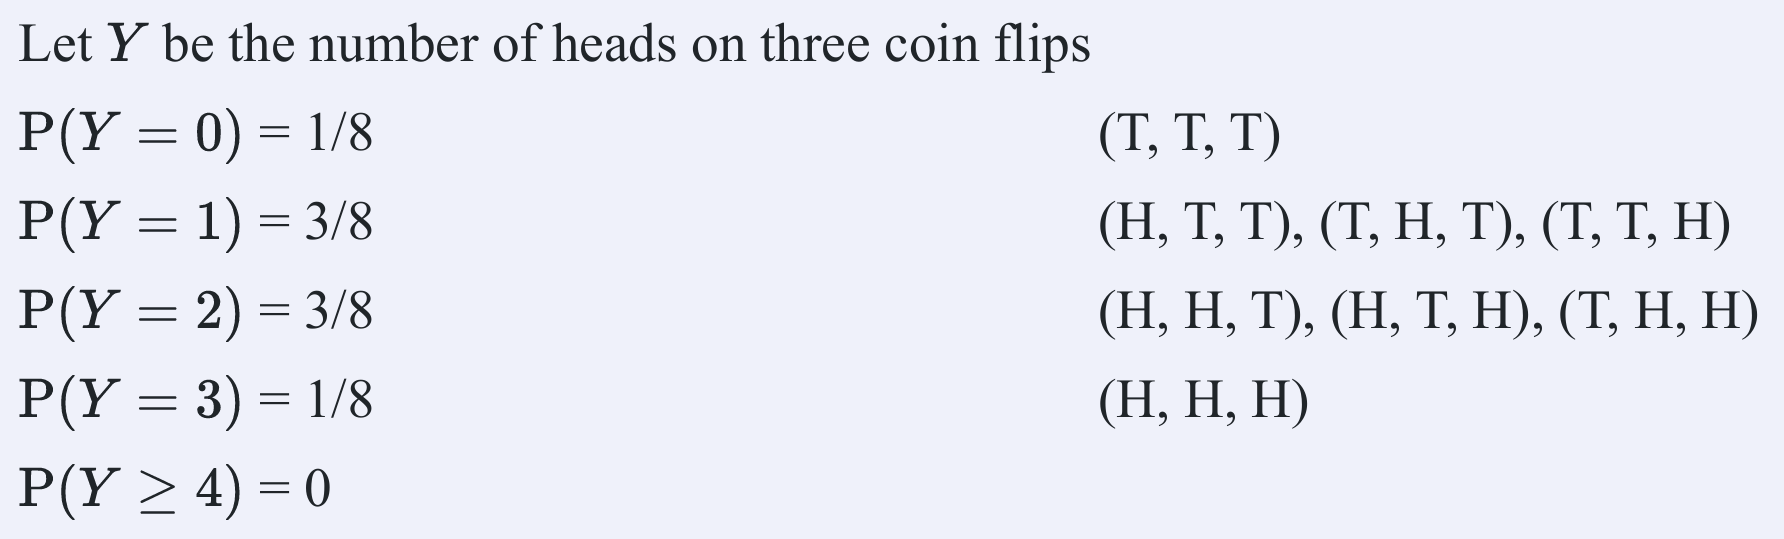

2 random variable types:
- discrete: only take integer values
- continuous: decimal values

#Probability Mass Functions
answer for question: "How likely is each outcome?" (onlyuu for discrete random variable)

Notation:
P(Y = y) same as P(y)

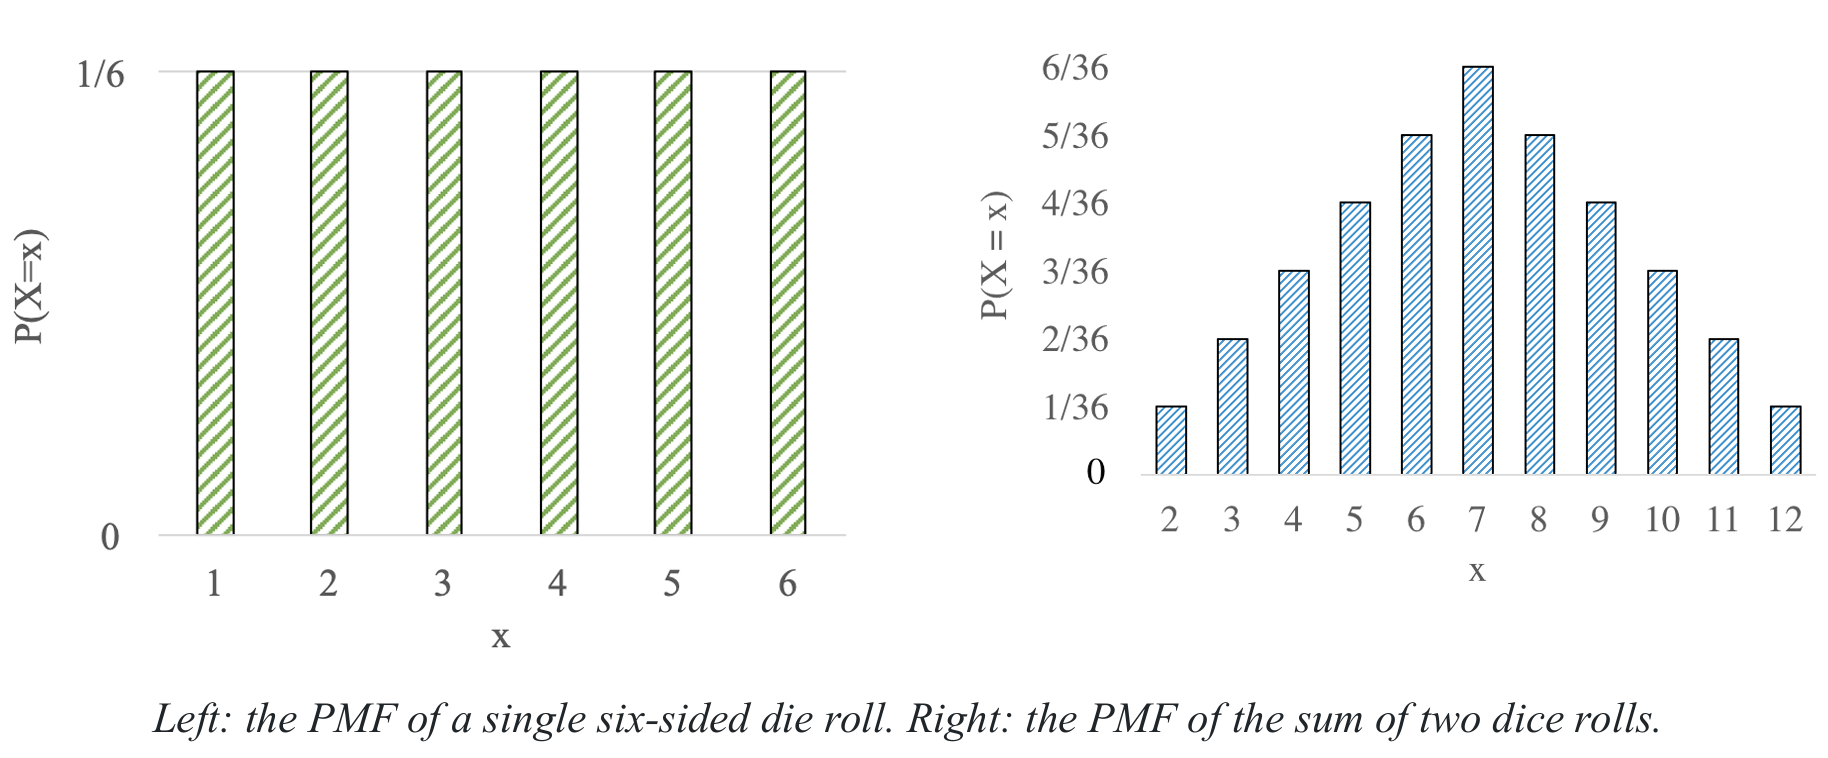

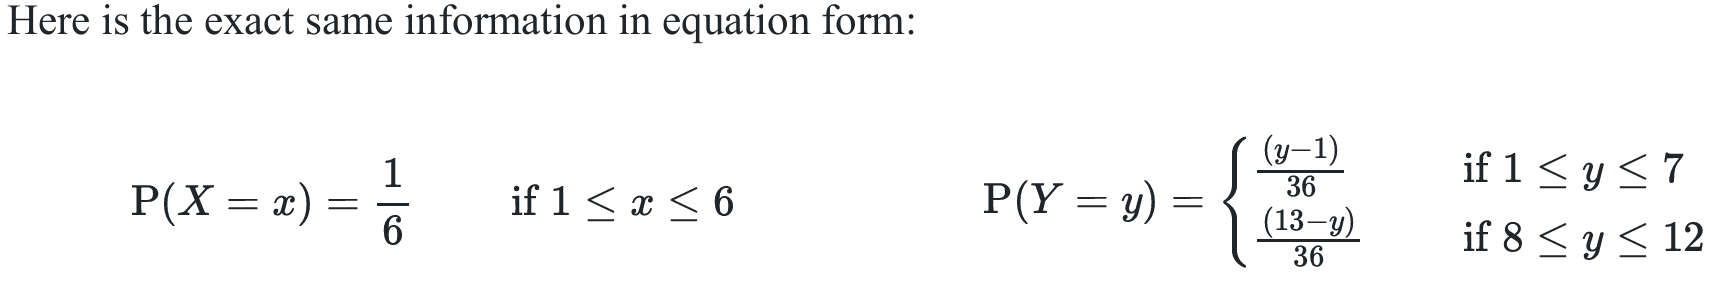

In [2]:
def pmf_sum_two_dice(y):
    if y < 2 or y > 12:
        return 0
    if y <= 7:
        return (y-1) / 36
    else:
        return (13-y) / 36

pmf_sum_two_dice(4)

0.08333333333333333

#Expectation
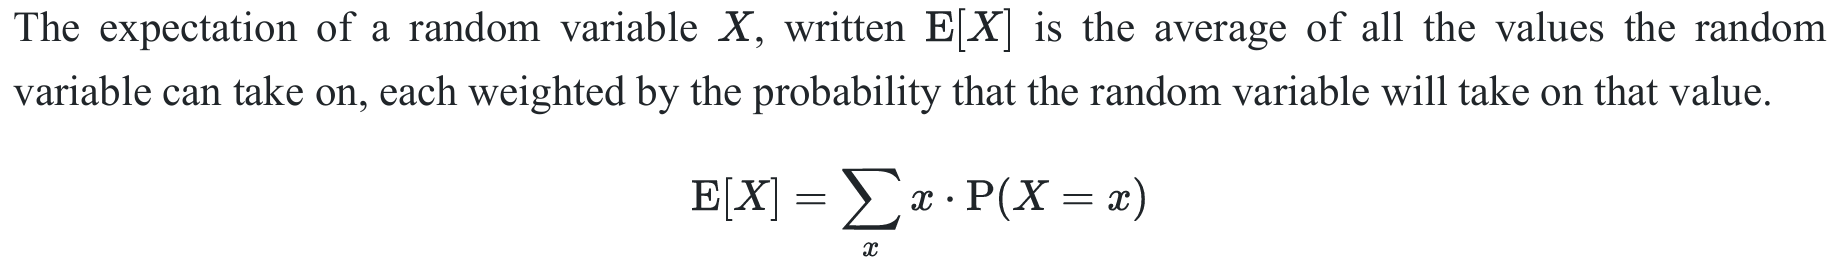

Other name: Mean, Weighted Average, Center of Mass, 1st Moment

In [3]:
def pmf_sum_2_dice(x):
  count = 0
  for dice1 in range(1, 7):
    for dice2 in range(1, 7):
      if dice1 + dice2 == x:
        count += 1
  return count/36

def expectation_sum_2_dice():
  ret = 0
  for i in range(2,13):
    ret += i*pmf_sum_2_dice(i)
  return ret

expectation_sum_2_dice()

6.999999999999999

In [8]:
def expectation(e, p):
  ret = 0
  for i in range(len(e)):
    ret += p[i]*e[i]
  return ret

expectation([0,1], [0.2, 0.8])

0.8

##Properties of Expectation

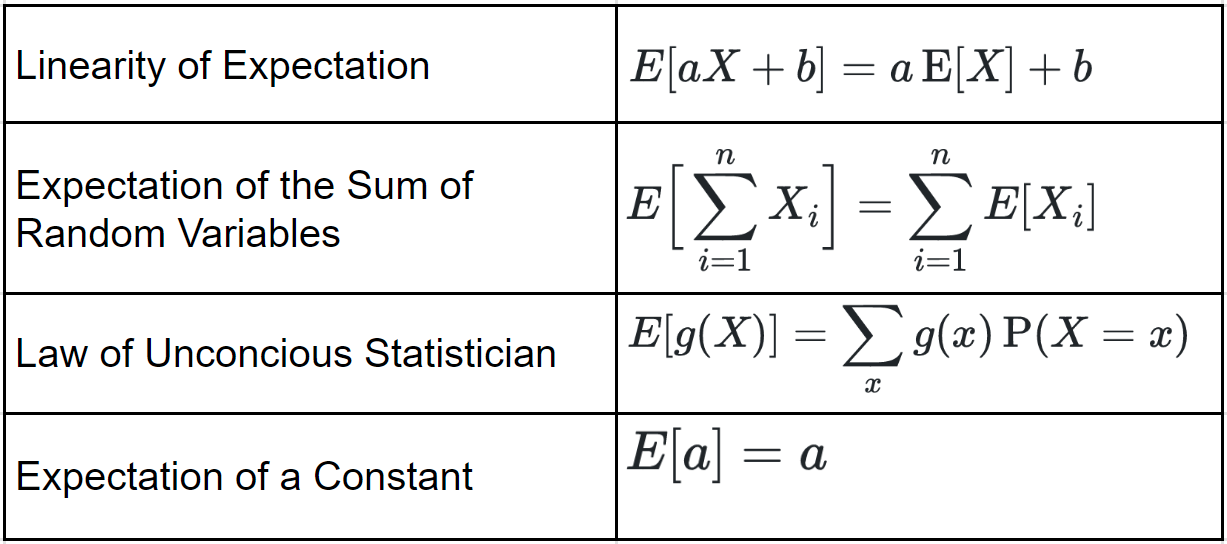

#Variance
the measure of the "spread"
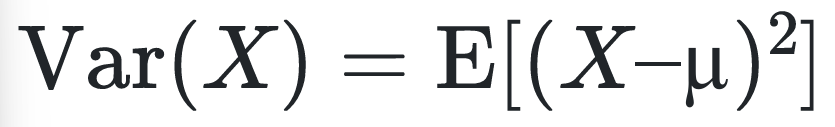

Equal:
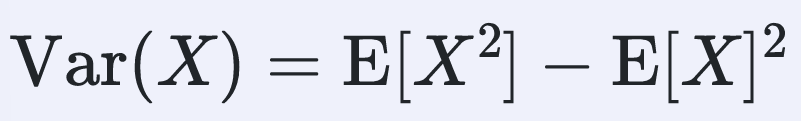

In [1]:
### For equally likely
def mean(s):
  total = 0
  for i in s:
    total += i
  return total/len(s)

def variance(s):
  v = 0
  m = mean(s)
  for i in s:
    v += (i - m)**2
  return v/len(s)

s = [1,2,3,4,5]
print(mean(s), variance(s))

3.0 2.0


##Standard Deviation
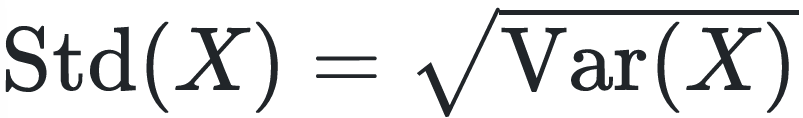
--> the average distance of a sample to the mean (euclidean distance function)

#Bernoulli Distribution
Bernoulli random variable = boolean/indicator random variable

If X is declared to be a Bernoulli random variable with parameter p, denoted X ~ Bern(p):

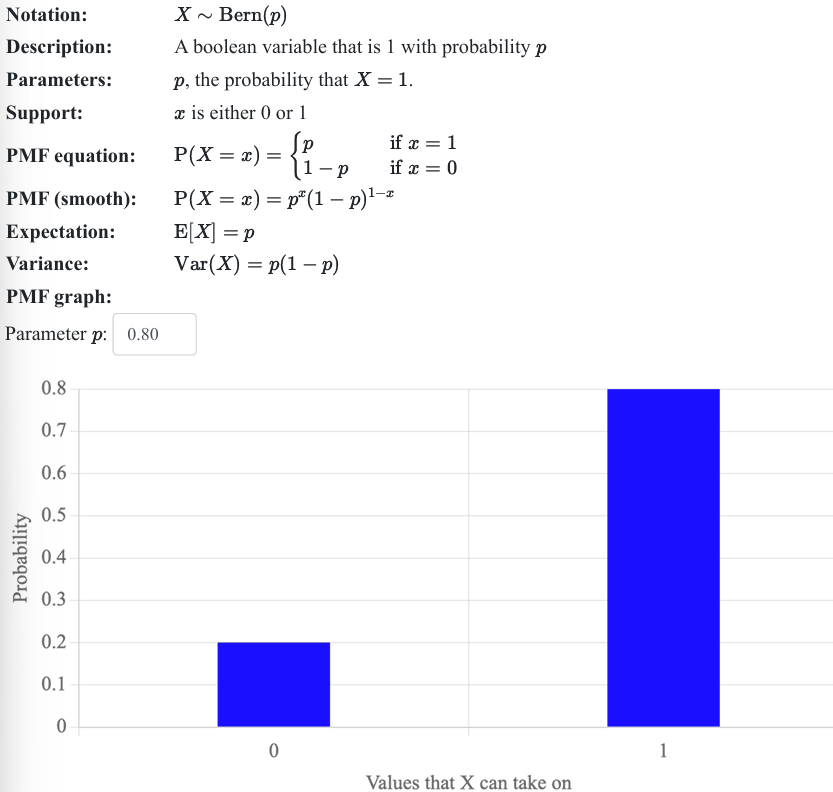

In [10]:
ept = 0.2*0 + 0.8*1
# variance = 0.2*((0-ept)**2) + 0.8*((1-ept)**2)
variance =  0.2*(0**2) + 0.8*(1**2) - ept**2
print(ept, variance)

0.8 0.15999999999999992


In [6]:
0.2*0.8

0.16000000000000003

In [18]:
class Bernoulli:
  def __init__(self, p):
    self.p = p
    self.expectation = self.p
    self.variance = self.p*(1-self.p)

  def pmf(self, x):
    if x == 1:
      return self.p
    if x == 0:
      return 1 - self.p
    print("Bernoulli random variable takes only 2 values: 1 and 0")

x = Bernoulli(0.8)
print(x.expectation, x.variance, x.pmf(2))

Bernoulli random variable takes only 2 values: 1 and 0
0.8 0.15999999999999998 None


#Binomial Distribution

Examples of binomial random variables:
- Number of heads in n coin flips
- Number of 1's in randomly generated length n bit string


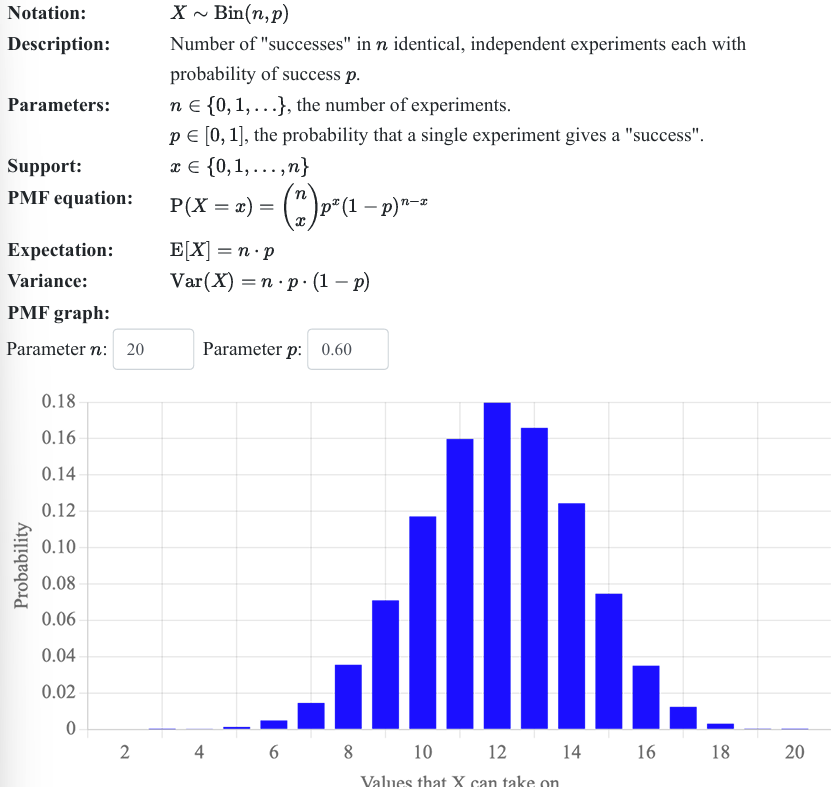

In [11]:
import math

class Binomial:
  def __init__(self, n, p):
    self.n = n
    self.p = p
    self.expectation = self.n*self.p
    self.variance = self.n*self.p*(1-self.p)

  def pmf(self, x):
    if x >= 0 and x <= self.n and x == int(x):
      return math.comb(self.n,x)*(self.p**x)*((1-self.p)**(self.n-x))

x = Binomial(20, 0.6)
print(x.pmf(12))

0.17970578775468937


#Poisson Distribution
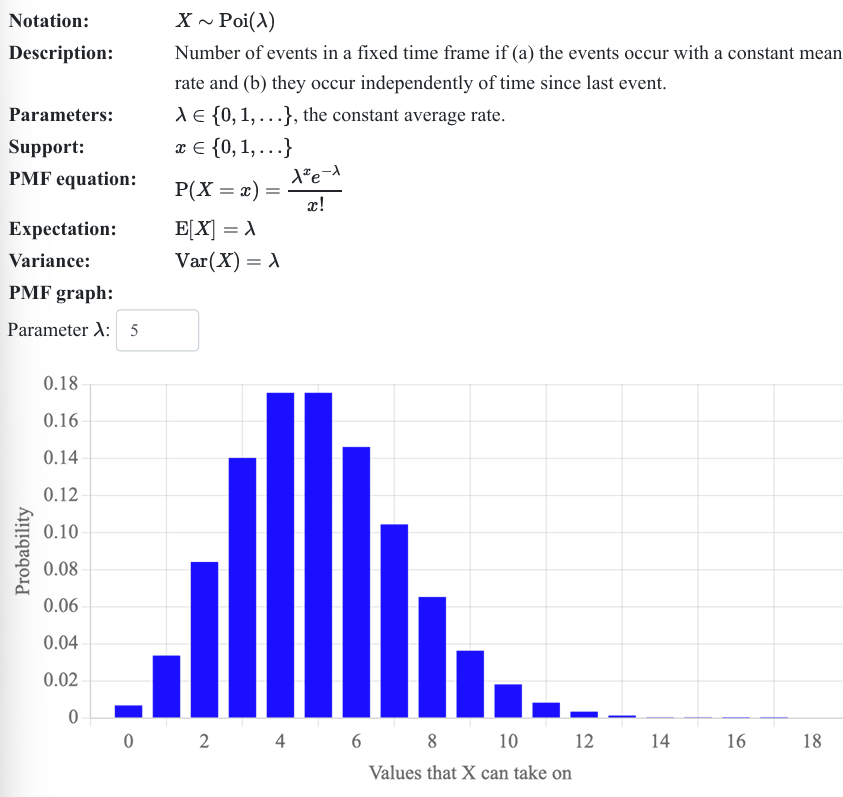

In [ ]:
class Poisson:
  def __init__(self, l):
    self.l = l
    self.expectation = self.l
    self.variance = self.l

  def pmf(self, x):
    if x >= 0 and x == int(x):
      return ((self.l**x)*())

## Changing time frame
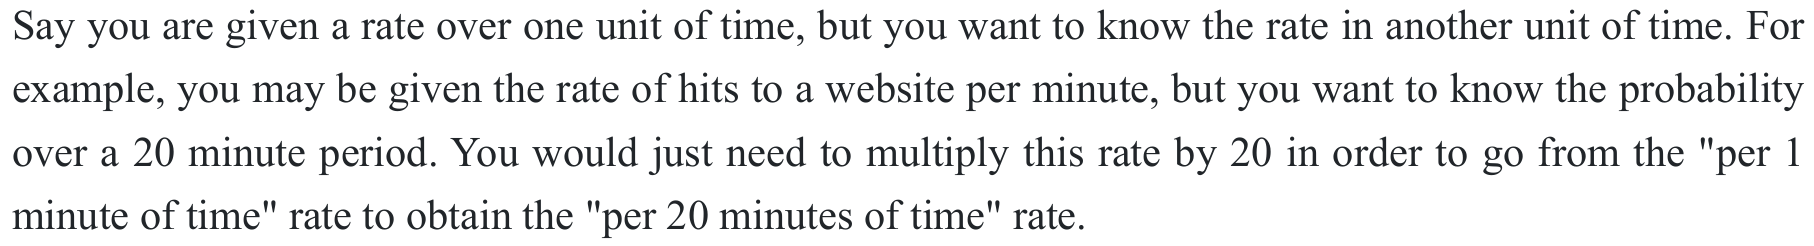

#More Discrete Distribution

##Geometric Random Variable
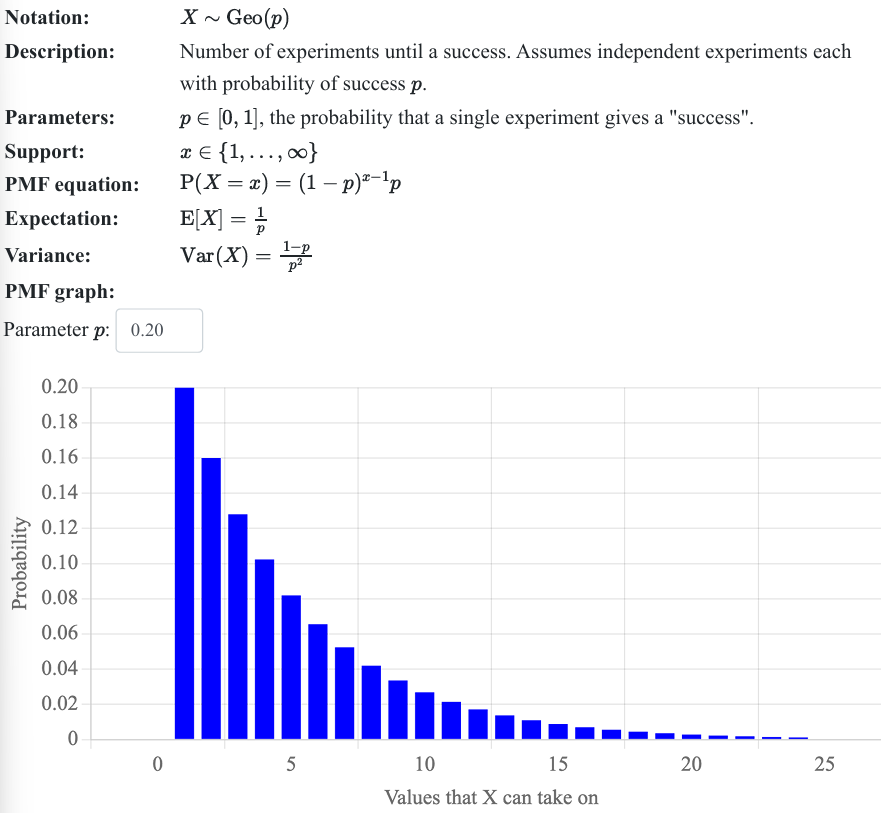

##Negative Binomial Random Variable
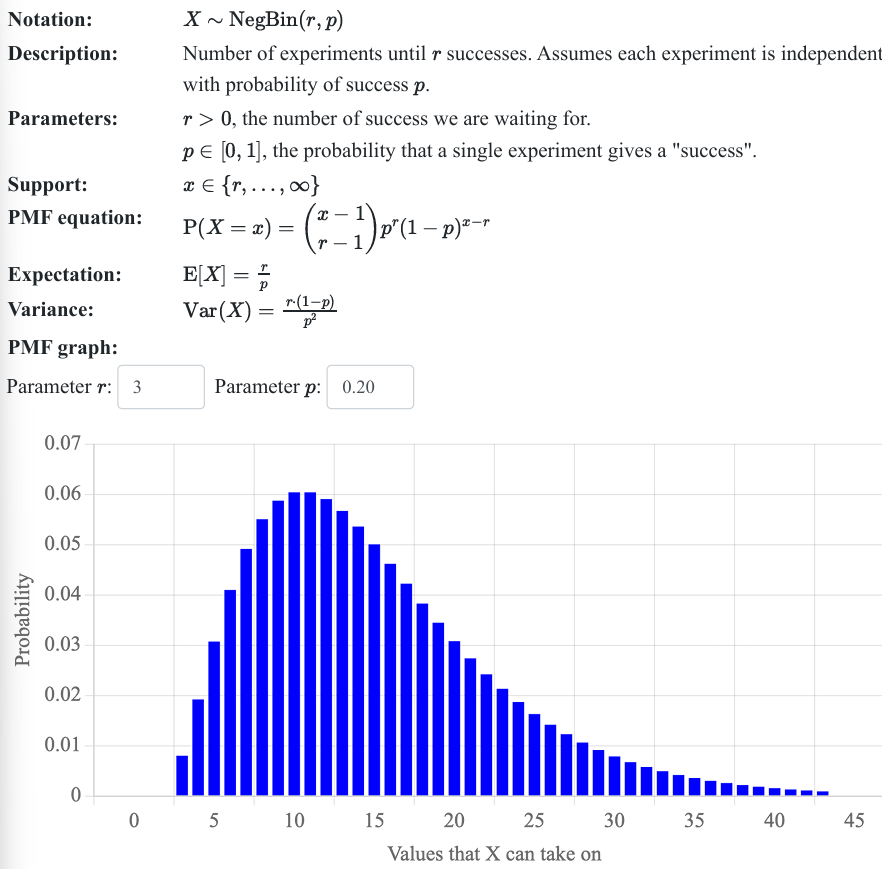

In [4]:
import math

class NegativeBinomial:
  def __init__(self, r, p):
    self.r = r
    self.p = p
    self.expectation = self.r/self.p
    self.variance = self.r*(1-self.p)/(self.p**2)

  def pmf(self, x):
    return math.comb(x-1, self.r-1)*(self.p**self.r)*((1-self.p)**(x-self.r))

x = NegativeBinomial(3, 0.2)
print(x.expectation, x.variance, x.pmf(5))

15.0 60.0 0.030720000000000015


#Categorical Distributions
Values are not numeric
=> Categorical random variables dont have:
- expectation,
- variance,
- PMF expressed as a function.

#Continuous Distribution

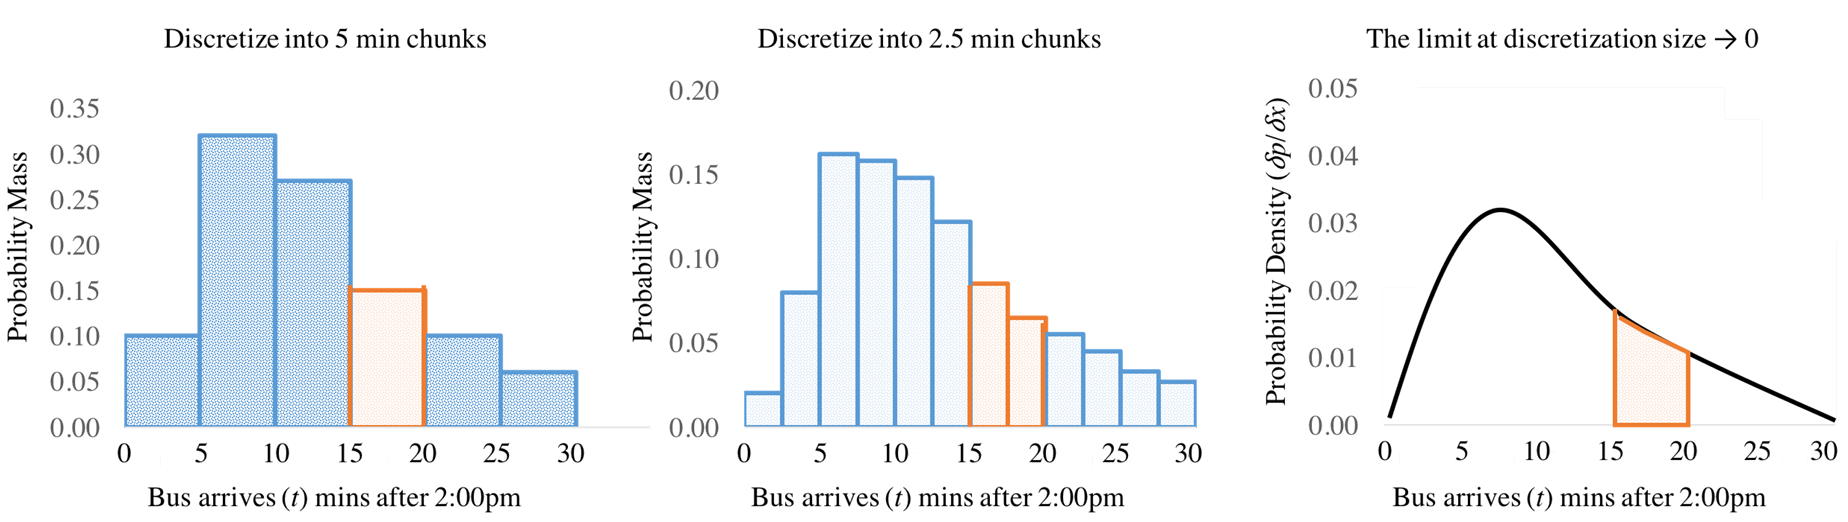

##Probability Density Function: f(X = x) or f(x)

f(x): PROBABILITY DENSITY (not probability)

Integrate over f(x) -> find the probability that a random variable takes on values in a range (a,b)

The probability that a continuous random variable takes on a specific value (to infinite precision) is 0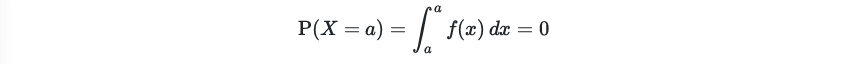

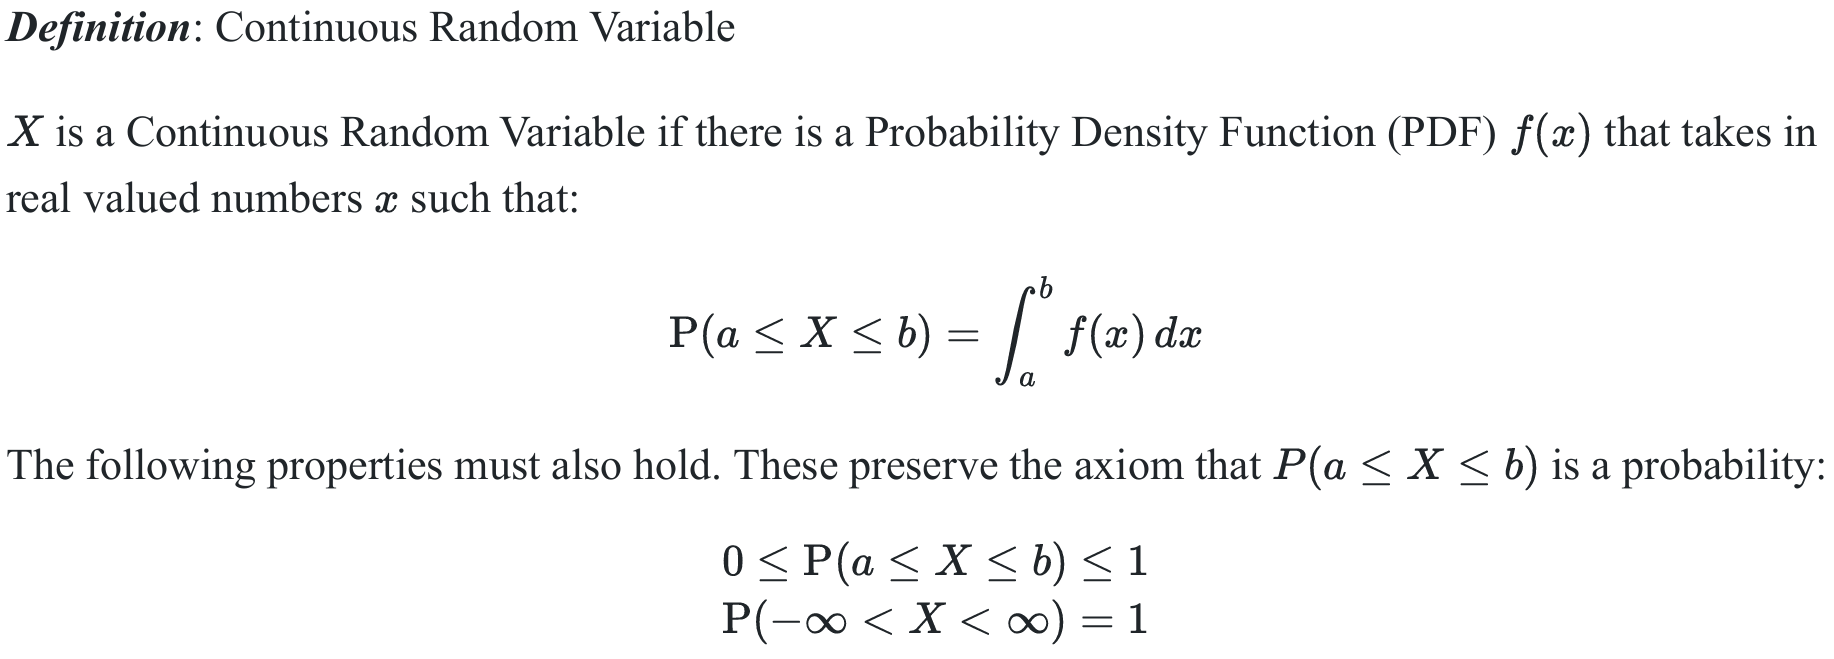

##Cumulative Distribution Function

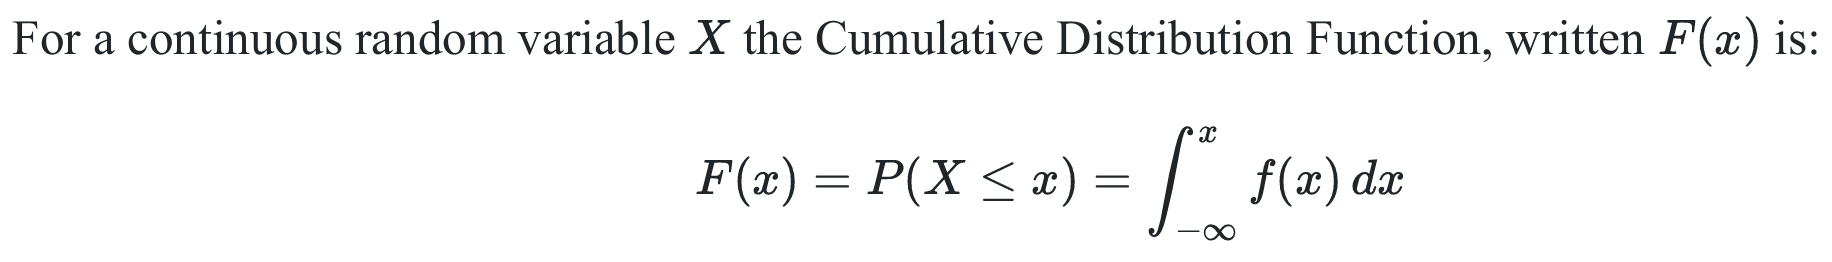

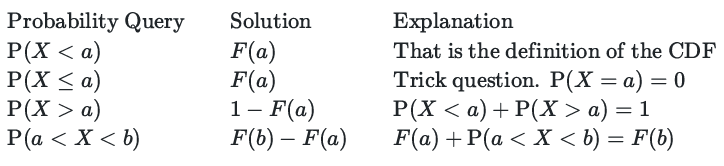

##Expectation & Variance

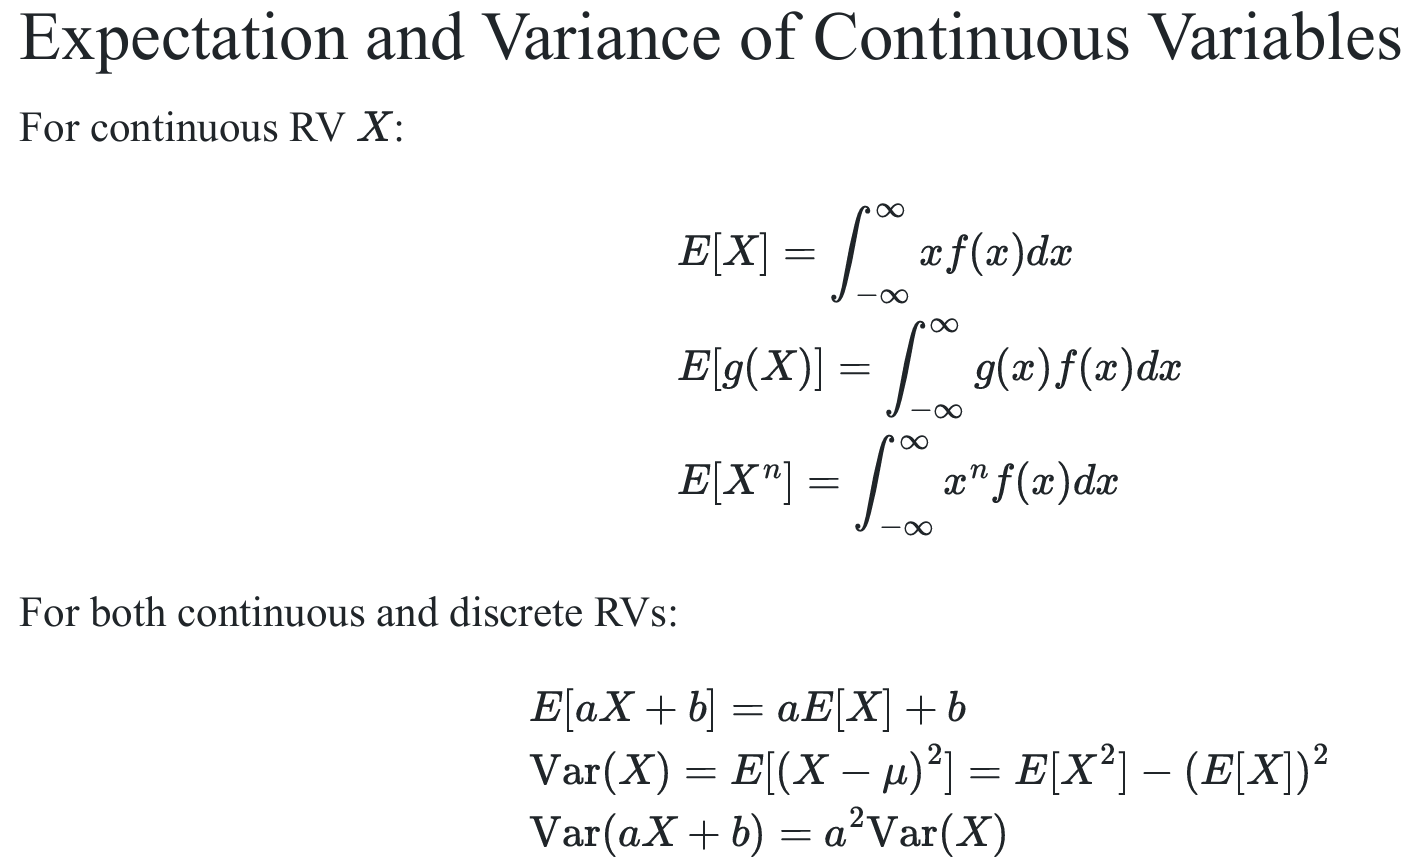

#Uniform Distribution

#Exponential Distribution
(not clear)

#Normal Distribution

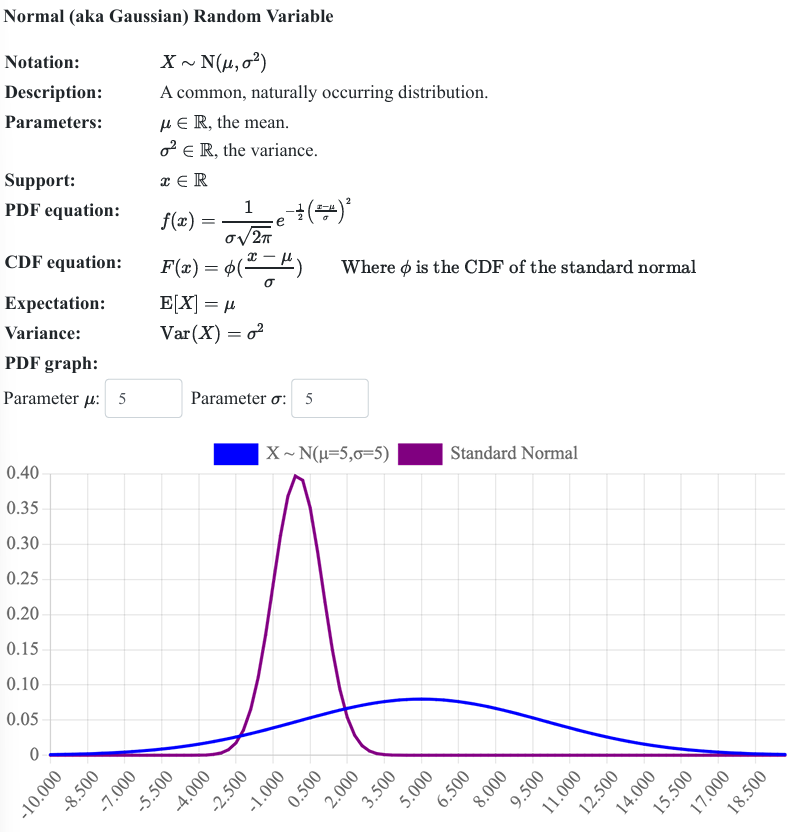

STANDARD NORMAL Z ~ N(0, 1)


In [10]:
from scipy import stats

mean = 0
std = 1
query = -3/4

X = stats.norm(mean, std)
p = X.cdf(query)

p = stats.norm.cdf(query, mean, std)
1-p

0.7733726476231317

#Binomial Approximation

##Poisson Approximation

n > 20 && p < 0.05

or

n > 100 && p < 0.1

In [7]:
(1 - 10**(-6))**(10**4)

0.9900498287986309

## Normal Approximation
n > 20 && p: mid-ranged

or

np(1-p) > 10

#Applications

[Binomial class](https://)

In [12]:
#Q1

X = Binomial(50, 0.5) #number of crash
print(X.variance**0.5)

3.5355339059327378


In [15]:
#Q2
from scipy import stats

X = stats.binom(30, 1/3) #number of click
print(X.mean())

X = Binomial(30, 1/3)
print(X.expectation)

10.0
10.0


In [24]:
#Q3

X = Binomial(50, (25-19)/25) #number of correct

#c1
print(1 - (19/25)**50)

#c2
ret = 0
for i in range(1,51):
  ret += X.pmf(i)
print(ret)

#c3
from scipy import stats

mean = X.expectation
std = X.variance**0.5
query = -mean/std

X2 = stats.norm(mean, std)
p = X2.cdf(query)

p = stats.norm.cdf(query, mean, std)
print(1-p)

0.9999989018046157
0.9999989018046156
0.9999999386363598


In [21]:
#Q4

X = Binomial(50, 0.5) # locations have wind
print(X.expectation)

25.0


In [22]:
#Q5

X = Binomial(30, 0.6) # locations have wind
print(X.variance**0.5)

2.6832815729997477


In [23]:
#Q7
X = Binomial(40, 3/10)
print(X.pmf(38))

5.162955264946168e-18


In [26]:
#Q9

X = Binomial(12, 5/12)
ret = 0
for i in range(0, 2):
  ret += X.pmf(i)
1 - ret

0.9851413863549604

In [28]:
X = Binomial(7, 0.55)
ret = 0
for i in range(4, 8):
  ret += X.pmf(i)
ret

1